In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

##  Loading Dataset

In [2]:
Train = pd.read_excel(r"C:\Users\Prince\OneDrive\Documents\Flight Prediction\Data_Train.xlsx") # train dataset



In [3]:
Train.head() # First 5 rows of Train dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
Test.head() # First 5 rows of Test dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
Train.shape # 10683 rows and 11 columns
Test.shape # 2671 rows and 10 colums

(2671, 10)

In [6]:
Train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Observations
our target variable Price is of Integer type and rest others are of object datatype
Route and Total_stops is having one null value

In [7]:
Train = Train.dropna(how='any',axis=0) # Dropping row with null values

In [194]:
Train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [195]:
Train.nunique() # checking number of unique values in each column

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

#### Observation
There are 12 Airlines
We have 5 sources
There is 6 different destination points
There are 10 different values in additional info

## EDA

In [10]:
Train["Journey_day"] = pd.to_datetime(Train.Date_of_Journey, format = "%d/%m/%Y").dt.day

In [11]:
Train["Journey_month"] = pd.to_datetime(Train.Date_of_Journey, format = "%d/%m/%Y").dt.month

In [12]:
Train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [15]:
Train.drop(["Date_of_Journey"], axis = 1, inplace = True) # we don't need this column now

In [16]:
# we need to do the same thing with departure time column
# Extracting hours
Train["Dep_hour"] = pd.to_datetime(Train["Dep_Time"]).dt.hour
# Extracting Minutes
Train["Dep_minutes"] = pd.to_datetime(Train["Dep_Time"]).dt.minute

Train.drop(["Dep_Time"], axis = 1, inplace = True) # we don't need this column now

In [17]:
Train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
# we need to do the same thing with Arrival_Time column
# Extracting hours
Train["Arrival_hour"] = pd.to_datetime(Train["Arrival_Time"]).dt.hour
# Extracting Minutes
Train["Arrival_min"] = pd.to_datetime(Train["Arrival_Time"]).dt.minute

Train.drop(["Arrival_Time"], axis = 1, inplace = True) # we don't need this column now

In [19]:
Train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [26]:
# Time taken by the flight to reach destination is called Duration
# it is a difference between  Departure and Arrival time

# assigning and converting Duration column into list
duration = list(Train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  # Adds 0 hour
duration_hour = []
duration_mins = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) # Extract only minutes from Duration

In [27]:
# Adding duration_hours and duration_mins list to Train dataframe

Train["Duration_hours"] = duration_hour
Train["Duration_mins"] = duration_mins

In [29]:
Train.drop(["Duration"], axis = 1, inplace = True) # we don't need this column now

In [30]:
Train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling categorical data
### 1. Nominal data: - data is not in any order :-> OneHotEncoder is used
### 2. Ordinal data: - data is in order:--> LabelEncoder is used

In [31]:
Train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [32]:
# as airline is nominal we will use onehot encoding

Airline = Train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
Train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

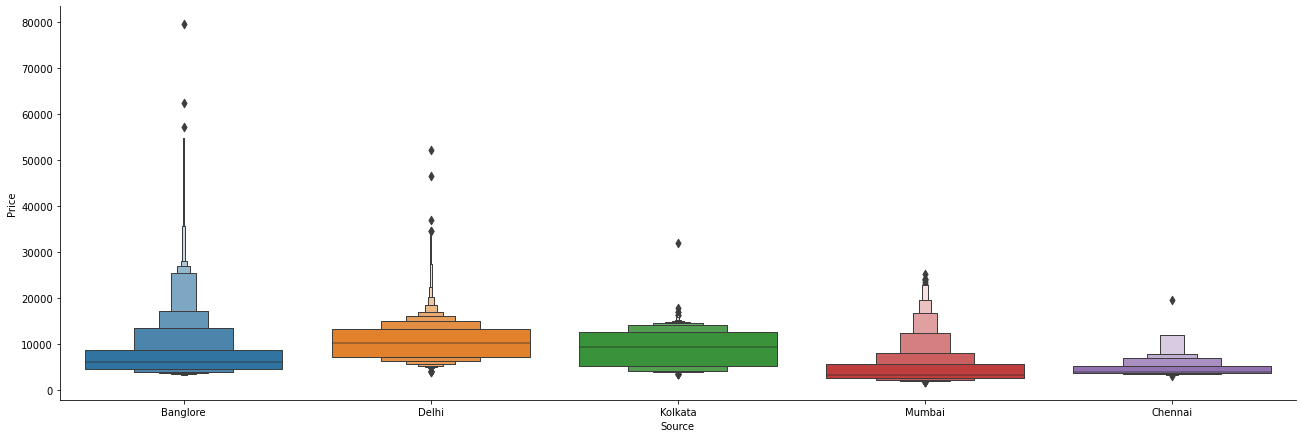

In [34]:
#Source vs Price

sns.catplot(y = "Price", x = "Source", data = Train.sort_values("Price", ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [35]:
# As Source is nominal we will use onehot encoding

Source = Train[["Source"]]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
Train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
# As Destination is nominal we will use onehot encoding

Destination = Train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
Train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [39]:
# Route and total stops are related to each other
# More than 80% info is missing from Additional_info
Train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [40]:
Train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
# this is the case of ordinal category type hence we will use LabelEncoder

Train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


In [42]:
# concatenate all the encoded columns to our dataframe

data_train = pd.concat([Train, Airline, Source, Destination], axis = 1)

In [43]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [44]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [45]:
data_train.shape

(10682, 30)

## Test data

In [46]:
Test = pd.read_excel(r"C:\Users\Prince\OneDrive\Documents\Flight Prediction\Test_set.xlsx") # test dataset

In [47]:
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
Train["Journey_day"] = pd.to_datetime(Train.Date_of_Journey, format = "%d/%m/%Y").dt.day
Train["Journey_month"] = pd.to_datetime(Train.Date_of_Journey, format = "%d/%m/%Y").dt.month

Train.drop(["Date_of_Journey"], axis = 1, inplace = True) # we don't need this column now

# we need to do the same thing with departure time column
# Extracting hours
Train["Dep_hour"] = pd.to_datetime(Train["Dep_Time"]).dt.hour
# Extracting Minutes
Train["Dep_minutes"] = pd.to_datetime(Train["Dep_Time"]).dt.minute

Train.drop(["Dep_Time"], axis = 1, inplace = True) # we don't need this column now


# we need to do the same thing with Arrival_Time column
# Extracting hours
Train["Arrival_hour"] = pd.to_datetime(Train["Arrival_Time"]).dt.hour
# Extracting Minutes
Train["Arrival_min"] = pd.to_datetime(Train["Arrival_Time"]).dt.minute

Train.drop(["Arrival_Time"], axis = 1, inplace = True) # we don't need this column now

# Time taken by the flight to reach destination is called Duration
# it is a difference between  Departure and Arrival time

# assigning and converting Duration column into list
duration = list(Train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" #Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]  # Adds 0 hour
duration_hour = []
duration_mins = []
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) # Extract only minutes from Duration
    
    # Adding duration_hours and duration_mins list to Train dataframe

Train["Duration_hours"] = duration_hour
Train["Duration_mins"] = duration_mins

Train.drop(["Duration"], axis = 1, inplace = True) # we don't need this column now

In [196]:
Train["Additional_Info"].value_counts() # checking what are the diffrent information available in this column

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Airline'>

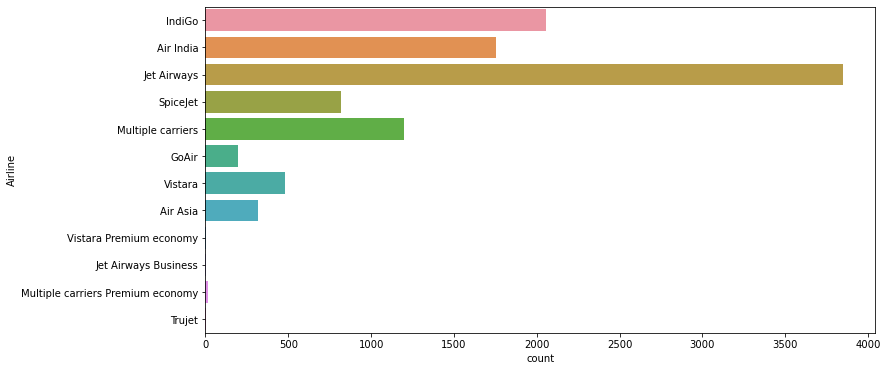

In [197]:
plt.figure(figsize=(12,6))

sns.countplot(y = Train["Airline"])

### Observations
##### JetAirways is having the highest count followed by Indigo followed by Air India
##### Vistara Premium economy, jetairways business and trujet is having least count

In [198]:
Train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

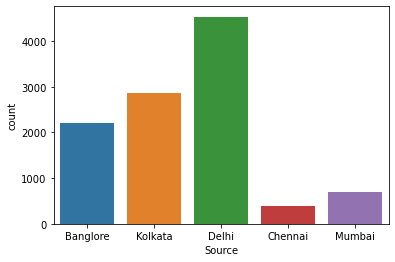

In [199]:
sns.countplot(Train["Source"])

### Observation
#### Most number of flights is having the source Delhi followed by kolkata

<AxesSubplot:xlabel='Destination', ylabel='count'>

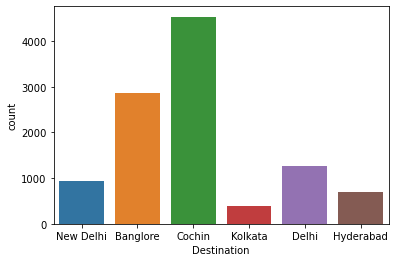

In [200]:
sns.countplot(Train["Destination"])

### Observation
#### Most of the flights is having the destination Cochin followed by Banglore

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

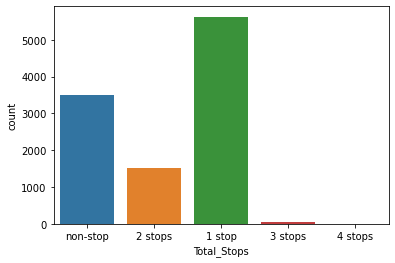

In [201]:
sns.countplot(Train["Total_Stops"])

### Observation
#### Maximum  flights are reaching their destinations with 1 stop or non stop

### Checking Outliers

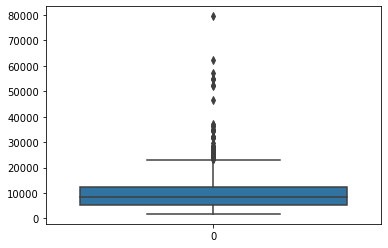

In [202]:
sns.boxplot(data = Train["Price"]); #There are outliers in our columns

In [203]:
# Applying log transformation to price coulumn
Train["Price"] = np.log(Train["Price"])
# Test["Price"] = np.log(Test["Price"])

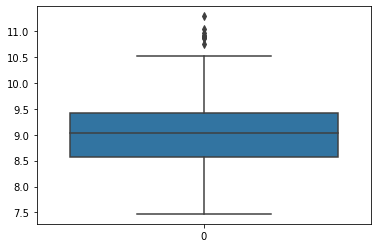

In [204]:
sns.boxplot(data = Train["Price"]); # checking again

### IQR method for removing ouliers

In [205]:
percentile25 = Train['Price'].quantile(0.25)
percentile75 = Train['Price'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

upper_limit # Checking Upper limit for Outliers

10.701510345426437

In [206]:
index = np.where(Train['Price'] > upper_limit)
Train = Train.drop(Train.index[index])

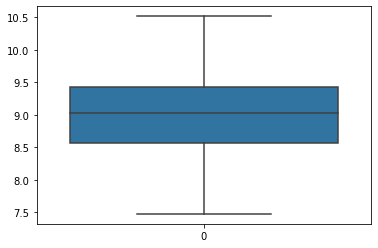

In [207]:
sns.boxplot(data = Train["Price"]);

In [208]:
Train.reset_index()

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,8.267962
1,1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,8.944028
2,2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9.538348
3,3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,8.735204
4,4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,9.495670
...,...,...,...,...,...,...,...,...,...,...,...,...
10668,10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,8.320448
10669,10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,8.329658
10670,10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,8.885856
10671,10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,9.445254


## Encoding

In [209]:
# encoding Train dataset
from sklearn.preprocessing import LabelEncoder

for column in Train.columns:
    if Train[column].dtype == np.number:
        continue
    Train[column] = LabelEncoder().fit_transform(Train[column])

In [210]:
# Encoding test dataset
for column in Test.columns:
    if Test[column].dtype == np.number:
        continue
    Test[column] = LabelEncoder().fit_transform(Test[column])

In [211]:
Test.head() # checking Test dataset after encoding

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5


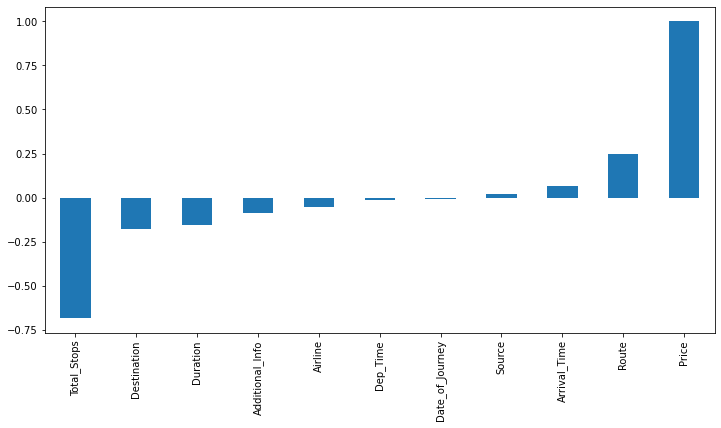

In [212]:
# Checking Correlation of variables with target variable
plt.figure(figsize=(12,6))
Train.corr()['Price'].sort_values().plot(kind='bar');

### Observation
#### Total_stops is negatively correlated with price i.e., more the number of stops lesser will be the price
#### With increase in Duration the price decreases

## Splitting features and target variable

In [213]:
X_Train = Train.drop(columns = ['Price'], axis = 1) # features
Y_Train = Train['Price'] # target variable

## Scaling

In [214]:
# scaling Train dataset's features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Train_scaler = scaler.fit_transform(X_Train)
Test_scaler = scaler.fit_transform(Test)

## Model building

### 1. Linear regression Model

In [215]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_Train, Y_Train)

LinearRegression()

In [216]:
# log_reg.fit(X_Train, Y_Train) # training our model

In [217]:
regression.score(X_Train, Y_Train) # Training score

0.49134475860100313

In [218]:
Y_pred_LinearRegression = regression.predict(Test) # Prediction

### 2. Lasso regression model

In [219]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
lasscv = LassoCV(alphas = None, max_iter =100, normalize = True)
lasscv.fit(X_Train, Y_Train)

LassoCV(max_iter=100, normalize=True)

In [220]:
alpha = lasscv.alpha_ # Finding alpha
alpha

3.372149523173125e-06

In [221]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_Train, Y_Train)

Lasso(alpha=3.372149523173125e-06)

In [222]:
lasso_reg.score(X_Train, Y_Train)

0.49134475841629865

In [223]:
Y_pred_lasso_reg = lasso_reg.predict(Test) # Prediction

### 3. Support vector machine model

In [224]:
from sklearn.svm import SVR
sv_regressor = SVR(kernel = 'rbf')
sv_regressor.fit(X_Train, Y_Train)

SVR()

In [225]:
sv_regressor.score(X_Train, Y_Train)

0.28977397094104307

In [226]:
Y_pred_sv_regressor = sv_regressor.predict(Test)

### 4. Decision tree model

In [227]:
from sklearn.tree import DecisionTreeRegressor


dt = DecisionTreeRegressor()
dt.fit(X_Train, Y_Train) # Training the model 


DecisionTreeRegressor()

In [228]:
dt.score(X_Train, Y_Train) # scores for training

0.9957716756540843

In [229]:
Y_pred_dt = dt.predict(Test)

### 5. Random forest model

In [230]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_Train, Y_Train)

RandomForestRegressor()

In [231]:
rf.score(X_Train, Y_Train)

0.9865550590090878

In [232]:
Y_pred_rf = rf.predict(Test)

### Out of the above 5 models, decision Tree regressor is giving us the best scores, Let's save our model

In [243]:
import pickle
filename = "Flight_prediction"
pickle.dump(dt, open(filename,'wb'))